In [ ]:
import sqlite3
import pandas as pd
!pip install kagglehub pandas

In [ ]:
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("surajjha101/stores-area-and-sales-data")

print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in dataset:", files)

Path to dataset files: /kaggle/input/stores-area-and-sales-data
Files in dataset: ['Stores.csv']


In [ ]:
# Assuming the first CSV is your main file
file_path = os.path.join(path, files[0])
df = pd.read_csv(file_path)
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
# Create DB connection
conn = sqlite3.connect("sales.db")

# Load DataFrame into SQLite
df.to_sql("sales_data", conn, if_exists='replace', index=False)

# Create cursor
cursor = conn.cursor()

# Run a query
cursor.execute("SELECT * FROM sales_data LIMIT 5")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 1659, 1961, 530, 66490)
(2, 1461, 1752, 210, 39820)
(3, 1340, 1609, 720, 54010)
(4, 1451, 1748, 620, 53730)
(5, 1770, 2111, 450, 46620)


Tells you how many tables are in my SQLite db

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    print("Table:", table[0])

Table: sales_data


In [ ]:
cursor.execute("PRAGMA table_info(sales_data)")
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'Store ID ', 'INTEGER', 0, None, 0)
(1, 'Store_Area', 'INTEGER', 0, None, 0)
(2, 'Items_Available', 'INTEGER', 0, None, 0)
(3, 'Daily_Customer_Count', 'INTEGER', 0, None, 0)
(4, 'Store_Sales', 'INTEGER', 0, None, 0)


In [ ]:
cursor.execute('SELECT COUNT("Store ID ") FROM sales_data')
result = cursor.fetchone()
print("Total stores in the dataset:", result[0])

Total stores in the dataset: 896


Top 5 stores by daily Sales

In [ ]:
cursor.execute("""
SELECT "Store ID ", Store_Sales
FROM sales_data
ORDER BY Store_Sales DESC
LIMIT 5
""")
top_sales = cursor.fetchall()
for row in top_sales:
    print(row)

(650, 116320)
(869, 105150)
(433, 102920)
(409, 102310)
(759, 101820)


Bottom 5 stores by daily customer count

In [ ]:
cursor.execute("""
SELECT "Store ID ", Daily_Customer_Count
FROM sales_data
ORDER BY Daily_Customer_Count ASC
LIMIT 5
""")
lowest_customers = cursor.fetchall()
for row in lowest_customers:
    print(row)

(40, 10)
(152, 70)
(877, 100)
(231, 120)
(147, 130)


Average Sales Grouped by Store Area

In [ ]:
cursor.execute("""
SELECT Store_Area, AVG(Store_Sales) AS Avg_Sales
FROM sales_data
GROUP BY Store_Area
ORDER BY Avg_Sales DESC
""")
avg_sales_area = cursor.fetchall()
for row in avg_sales_area:
    print(row)

(1989, 116320.0)
(1775, 105150.0)
(1303, 102310.0)
(1486, 101820.0)
(1137, 101780.0)
(1465, 99570.0)
(1800, 98260.0)
(1931, 97260.0)
(1354, 95900.0)
(1834, 94460.0)
(1374, 94170.0)
(1291, 93950.0)
(1548, 92405.0)
(1156, 92370.0)
(1296, 92300.0)
(1829, 92240.0)
(1555, 91360.0)
(1175, 91200.0)
(1395, 90940.0)
(1287, 90180.0)
(1814, 90070.0)
(1948, 89540.0)
(1262, 89080.0)
(1841, 88760.0)
(1723, 88410.0)
(1259, 88270.0)
(1237, 88210.0)
(1534, 88150.0)
(2229, 87410.0)
(1859, 87000.0)
(1336, 86620.0)
(1971, 86560.0)
(966, 85470.0)
(1143, 85160.0)
(1850, 85000.0)
(1715, 84860.0)
(1185, 84840.0)
(1679, 84300.0)
(1382, 83720.0)
(1470, 83660.0)
(1257, 83250.0)
(1560, 83220.0)
(1362, 82940.0)
(1905, 82350.0)
(1387, 82080.0)
(1635, 82070.0)
(1743, 81930.0)
(1699, 81870.0)
(1383, 81390.0)
(994, 81390.0)
(2044, 81180.0)
(1365, 81113.33333333333)
(1787, 80970.0)
(1193, 80830.0)
(1157, 80780.0)
(1473, 80720.0)
(1648, 80576.66666666667)
(1855, 80490.0)
(1922, 80410.0)
(1179, 79850.0)
(1947, 79780.0)
(

Lets Create a Table for High-Performing Stores: Top 5
---



In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS high_performance_stores AS
SELECT *
FROM sales_data
WHERE Store_Sales > (SELECT AVG(Store_Sales) FROM sales_data)
""")
conn.commit()

cursor.execute("SELECT * FROM high_performance_stores LIMIT 5")
for row in cursor.fetchall():
    print(row)

(1, 1659, 1961, 530, 66490)
(7, 1542, 1858, 1030, 72240)
(11, 1187, 1439, 1090, 71280)
(13, 1746, 2064, 1050, 60470)
(15, 1469, 1756, 770, 66360)


Rename Store ID TO Store_ID: Process

In [ ]:
cursor.execute("""
CREATE TABLE cleaned_sales_data (
    Store_ID INTEGER,
    Store_Area INTEGER,
    Items_Available INTEGER,
    Daily_Customer_Count INTEGER,
    Store_Sales INTEGER
)
""")

Create a new table with correct column names

In [ ]:
cursor.execute("""
INSERT INTO cleaned_sales_data (Store_ID, Store_Area, Items_Available, Daily_Customer_Count, Store_Sales)
SELECT "Store ID ", Store_Area, Items_Available, Daily_Customer_Count, Store_Sales
FROM sales_data
""")
conn.commit()

Copy data from original to new table

I dropped the old table

In [ ]:
cursor.execute("DROP TABLE sales_data")
conn.commit()

Then I renamed the new table to sales_data

In [ ]:
cursor.execute("ALTER TABLE cleaned_sales_data RENAME TO sales_data")
conn.commit()

Confirmed my changes

In [ ]:
cursor.execute("PRAGMA table_info(sales_data)")
for col in cursor.fetchall():
    print(col)

(0, 'Store_ID', 'INTEGER', 0, None, 0)
(1, 'Store_Area', 'INTEGER', 0, None, 0)
(2, 'Items_Available', 'INTEGER', 0, None, 0)
(3, 'Daily_Customer_Count', 'INTEGER', 0, None, 0)
(4, 'Store_Sales', 'INTEGER', 0, None, 0)


Loaded My data into a DATAFRAME

In [ ]:
import pandas as pd

# Load data from your cleaned table
df = pd.read_sql_query("SELECT * FROM sales_data", conn)

# Preview the first few rows
df.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


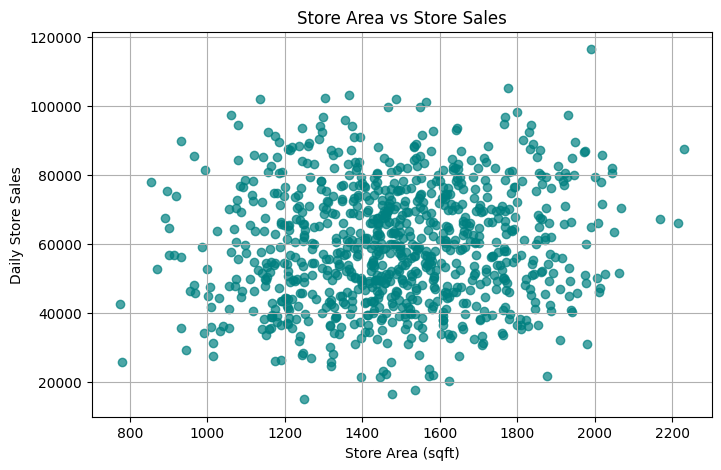

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Store_Area'], df['Store_Sales'], alpha=0.7, color='teal')
plt.title('Store Area vs Store Sales')
plt.xlabel('Store Area (sqft)')
plt.ylabel('Daily Store Sales')
plt.grid(True)
plt.show()

Bar Plot

Top 10 highest Earning Stores

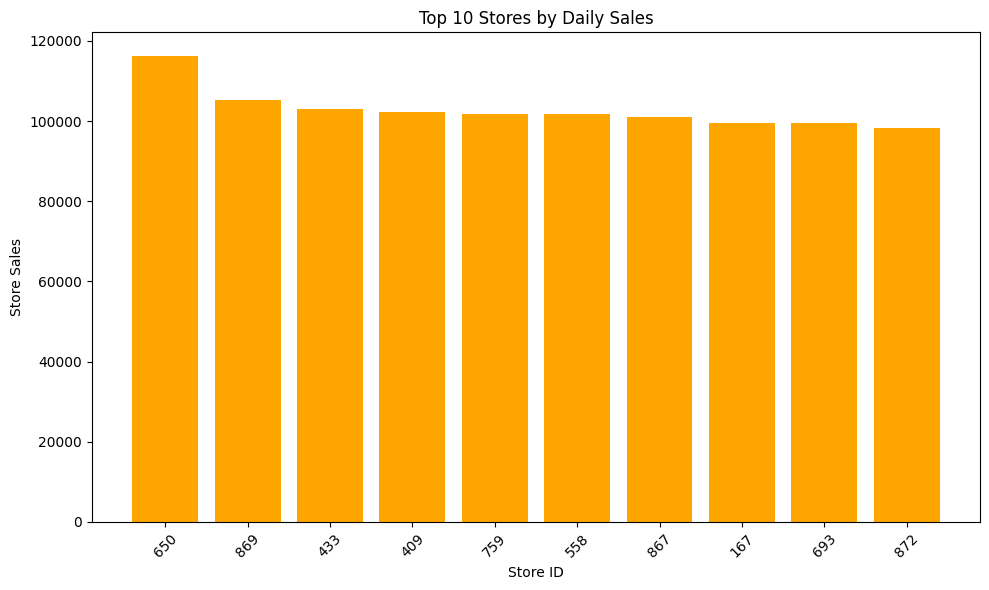

In [ ]:
top_stores = df.sort_values(by='Store_Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_stores['Store_ID'].astype(str), top_stores['Store_Sales'], color='orange')
plt.title('Top 10 Stores by Daily Sales')
plt.xlabel('Store ID')
plt.ylabel('Store Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Store Areas

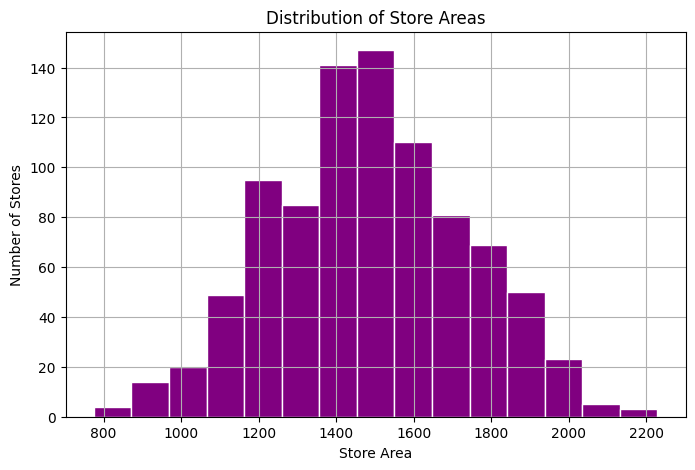

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Store_Area'], bins=15, color='purple', edgecolor='white')
plt.title('Distribution of Store Areas')
plt.xlabel('Store Area')
plt.ylabel('Number of Stores')
plt.grid(True)
plt.show()

Daily Customer count and sales

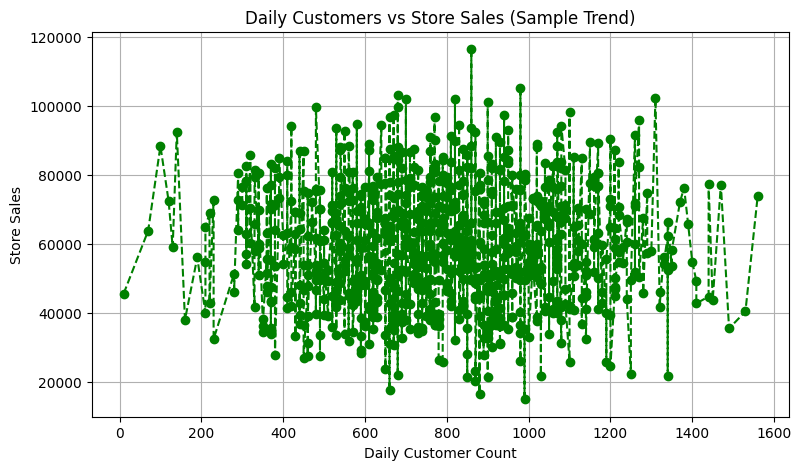

In [ ]:
sample = df.sort_values(by='Daily_Customer_Count').reset_index(drop=True)

plt.figure(figsize=(9,5))
plt.plot(sample['Daily_Customer_Count'], sample['Store_Sales'], marker='o', linestyle='--', color='green')
plt.title('Daily Customers vs Store Sales (Sample Trend)')
plt.xlabel('Daily Customer Count')
plt.ylabel('Store Sales')
plt.grid(True)
plt.show()

<ipython-input-38-b829fa1f1e02>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Size_Category', y='Store_Sales', palette='Set2')


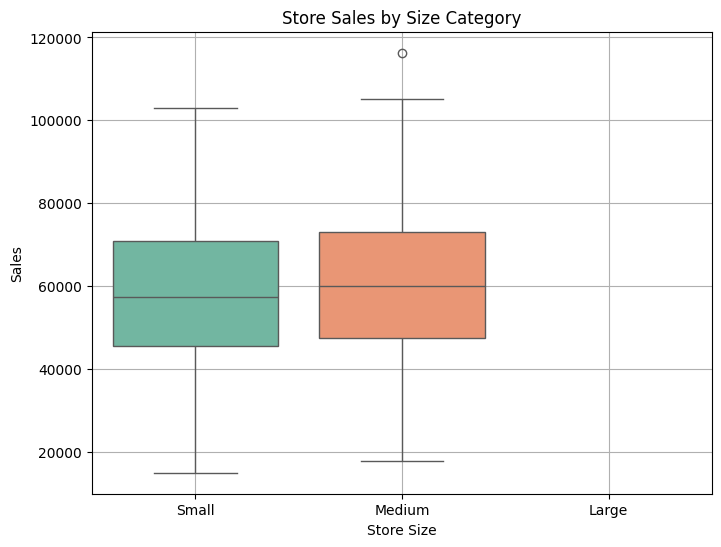

In [ ]:
# Create size category
df['Size_Category'] = pd.cut(df['Store_Area'],
                             bins=[0, 1500, 2500, 3500],
                             labels=['Small', 'Medium', 'Large'])

# Boxplot
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Size_Category', y='Store_Sales', palette='Set2')
plt.title('Store Sales by Size Category')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.grid(True)
plt.show()